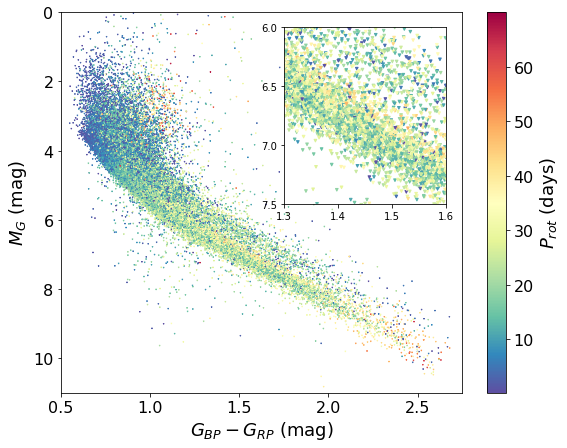

In [17]:
import pandas
import math
import matplotlib.pyplot as plt
import matplotlib as mp
import matplotlib.cm as cm
import numpy as np
from IPython.display import set_matplotlib_formats

def main():
    # Reading the CSV into a pandas dataframe, making cuts, and collecting the distance modulus 
    Kepler = pandas.read_csv("../McQuillan/keplerMcQuillan.csv")
    Kepler = Kepler[(Kepler.phot_g_mean_flux_over_error >= 50) & (Kepler.phot_rp_mean_flux_over_error >= 20) & (Kepler.phot_bp_mean_flux_over_error >= 20) & (Kepler.parallax > 0)]
    KeplerDistMod = distMod(Kepler["parallax"])
    
    # Using Davenports colormap
    cm = plt.cm.get_cmap('Spectral_r')
    fig, ax1 = plt.subplots(figsize=(9,7))



    # Plotting my own data/cols/etc.
    plt.scatter(Kepler["bp_rp"], Kepler["phot_g_mean_mag"] - KeplerDistMod, marker = "v", s = 0.5, c = Kepler["Prot"], label = "Kepler", cmap = cm)
    plt.ylabel("$M_G$ (mag)")
    plt.xlabel("$G_{BP} - G_{RP}$ (mag)")
    plt.ylim(11, 0)
    plt.xlim(0.5, 2.75)

    # Setting up colorbar after colormap has been defined
    cb = plt.colorbar()
    cb.set_label("$P_{rot}$ (days)")

    # Defining the inset plot
    ax2 = fig.add_axes([0.47, 0.5, 0.25, 0.35])
    ax2.tick_params(labelsize = 10)
    ax2.scatter(Kepler["bp_rp"], Kepler["phot_g_mean_mag"] - KeplerDistMod, marker = "v", s = 7, c = Kepler["Prot"], cmap = cm)

    ax2.set_xlim(1.3,1.6)
    ax2.set_ylim(7.5, 6)
    ax2.set_yticks([7.5, 7, 6.5, 6])


    # Using Davenports image settings
    set_matplotlib_formats('pdf', 'png')
    plt.rcParams['savefig.dpi'] = 200
    plt.rcParams['figure.autolayout'] = False
    plt.rcParams['figure.figsize'] = 6,6
    plt.rcParams['axes.labelsize'] = 18
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['font.size'] = 16
    plt.rcParams['lines.linewidth'] = 2.0
    plt.rcParams['lines.markersize'] = 8
    plt.rcParams['legend.fontsize'] = 14
    mp.rcParams['xtick.direction'] = 'out'
    mp.rcParams['ytick.direction'] = 'out'
    plt.show()

def distMod(parallax):
	result = 5*(np.log10(1000/parallax) - 1)
	return result


main()